In [55]:
# Necessary imports

import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/Users/emilynieves/project_440/GDC_Data_test/'

In [3]:
'''
We need to be able to determine which files are associated with
a given patient. The json file contains this information. Here
we are storing all the metadata.
'''

with open('/Users/emilynieves/project_440/GDC_Metadata.json') as file:
    json_string = file.readlines()
    json_string = ''.join(json_string)
metadata = json.loads(json_string)

In [4]:
'''
Making a dictionary where each key is the Case ID, and the value
is a list of the files associated with each patient.
'''

# Dictionary of Case IDs
case_id_dict = {}

# For each entry in the metadata from the json file
for entry in metadata:
    
    # Getting the case ID
    case_id = entry['associated_entities'][0]['case_id']
    # Getting the associated file name
    file_name = entry['file_name']
    
    # If the Case ID is already in the dictionary, add the file
    # name to the list of values
    if case_id in case_id_dict:
        case_id_dict[case_id].append(file_name)
    # If not already in the dictionary, add new key and value
    else:
        case_id_dict[case_id] = [file_name]

In [5]:
'''
Some patients don't have both the microRNA and mRNA files, so we
need to remove those from analysis. Some also have samples from
healthy tissue, which we will use later in the project but are
removing for now. Thus, we want patients that only have 2 files
associated to them.
'''

# List of Case IDs that have the right number of files
tumor_case_ids = []

# For each Case ID
for key in case_id_dict:
    # If they have 2 files, add them to the list of files to use
    if len(case_id_dict[key]) == 2:
        tumor_case_ids.append(key)

In [43]:
# Looking at microRNA counts for 500 patients
num_patients = 500
cases = tumor_case_ids[0:num_patients]

mirna_98_data=[]

# For each patient
for case in cases:
    # Get their case files
    case_files = case_id_dict[case]
    for file in case_files:
        # Get the microRNA file
        if file[-1] == 't':
            case_file_mrna = path + file
            # Load the microRNA file as an array
            mrnas = np.loadtxt(case_file_mrna, dtype='str')
            # Removing the column titles
            mrnas = np.delete(mrnas, 0, 0)
            # Getting the counts of the miRNA 98 
            mrna_df= pd.DataFrame(mrnas)
            index= mrna_df.index[mrna_df[0]=='hsa-mir-98'].tolist()
            mir_98_count_series= mrna_df.iloc[index, 1]
            mir_98_count= mir_98_count_series.item()
            # append to list of counts 
            mirna_98_data.append(mir_98_count)
            



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


Text(0.5, 1.0, 'Histogram of MiRNA hsa-mir-98 Read Counts')

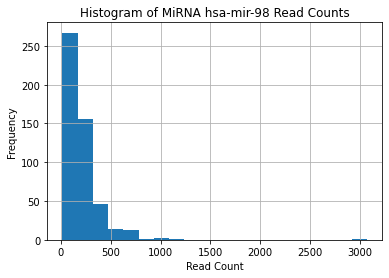

In [75]:
#Convert data list to list of integers
mirna_98_data=[int(i) for i in mirna_98_data]

#Create histogram of read counts for hsa-mir-98
plt.hist(mirna_98_data, bins=20)
plt.grid(True)
plt.xlabel('Read Count')
plt.ylabel('Frequency')
plt.title("Histogram of MiRNA hsa-mir-98 Read Counts")